<a id="segundo"></a>
## 2. Un problema* Multi-label*

<img src="https://files.virgool.io/upload/users/12226/posts/oxo6jvmweqmr/1ios2rcvohwc.png" width="35%" style="float: right;" />

Un tipo de problema un poco diferente a la clásica clasificación que hemos visto es el de etiquetación múltiple o *multi-label* [[5]](#refs), en donde se debe asignar una *o un grupo* de etiquetas a un dato, es decir, puede ser tratado como un problema de clasificación donde las clases pasan a ser **NO** mutuamente excluyente, es decir puede ser asignada más de una a un dato. Este problema se ve muchas veces en imágenes que contienen más de algun objeto, por lo que las clases pasan a ser no excluyente, o en sí se transforma en un problema de *multi-label*. También aparece en texto cuando se debe asignar un tópico a un documento, ya que podría hablar de diferentes cosas, como religión, política, finanzas o educación, por lo que podría contener varios.


En esta actividad se trabajará con una versión liviana del dataset __[**NUS-WIDE**](https://lms.comp.nus.edu.sg/research/NUS-WIDE.htm)__ , el cual consta de imágenes extraídas de la web (Flickr.com) en donde los diferentes *tags* o conceptos asociados a la imagen pasan a ser las etiquetas/*labels*. De la página donde se alberga NUS-WIDE será necesario descargar:
* Concept List: http://dl.nextcenter.org/public/nuswide/ConceptsList.zip
* NUS-WIDE-Lite: http://dl.nextcenter.org/public/nuswide/NUS-WIDE-Lite.rar
* NUS-WIDE-Urls: http://dl.nextcenter.org/public/nuswide/NUS-WIDE-urls.rar


> a) Cargue los datos del *output* del modelo (*labels*), descríbalos ¿Cuántos ejemplos hay por cada clase?




In [1]:
import pandas as pd
import numpy as np
y = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_groundtruth/Lite_GT_Train.txt",delimiter="\s",header=None).values
y.shape

C:\Users\rosar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


(27807, 81)

categoria 0 tiene  342 ejemplo
categoria 1 tiene  2968 ejemplo
categoria 2 tiene  2097 ejemplo
categoria 3 tiene  68 ejemplo
categoria 4 tiene  471 ejemplo
categoria 5 tiene  1551 ejemplo
categoria 6 tiene  11 ejemplo
categoria 7 tiene  717 ejemplo
categoria 8 tiene  4652 ejemplo
categoria 9 tiene  348 ejemplo
categoria 10 tiene  172 ejemplo
categoria 11 tiene  113 ejemplo
categoria 12 tiene  830 ejemplo
categoria 13 tiene  15538 ejemplo
categoria 14 tiene  27 ejemplo
categoria 15 tiene  363 ejemplo
categoria 16 tiene  199 ejemplo
categoria 17 tiene  44 ejemplo
categoria 18 tiene  237 ejemplo
categoria 19 tiene  8 ejemplo
categoria 20 tiene  116 ejemplo
categoria 21 tiene  151 ejemplo
categoria 22 tiene  346 ejemplo
categoria 23 tiene  40 ejemplo
categoria 24 tiene  615 ejemplo
categoria 25 tiene  70 ejemplo
categoria 26 tiene  58 ejemplo
categoria 27 tiene  247 ejemplo
categoria 28 tiene  802 ejemplo
categoria 29 tiene  187 ejemplo
categoria 30 tiene  4933 ejemplo
categoria 31 tiene  

<BarContainer object of 81 artists>

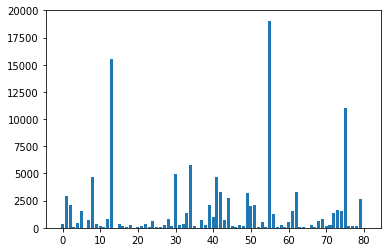

In [6]:
import matplotlib.pyplot as plt

df =pd.DataFrame(y)
categoria=[]
ejemplos=[]
for i in range(81):
    categoria.append(i)
    print('categoria', i, 'tiene ', df[i].value_counts()[1], 'ejemplo')
    ejemplos.append(df[i].value_counts()[1])

plt.bar(categoria, ejemplos)


In [17]:
print( 'mínima cantidad de ejemplos por categoria', min(ejemplos))
print('máxima cantidad de ejemplos por categoria', max(ejemplos))

mínima cantidad de ejemplos por categoria 3
máxima cantidad de ejemplos por categoria 19052


Hay 81 clases distintas cada una con una cantidad diferente de ejemplos (desde 3 hasta 19052). No se encuentran balanceadas las muestras por categoría, tampoco existe una cantidad fija de etiquetas por imagen.

> b) Visualice el tema de que un dato  (imagen en este caso) puede tener múltiples etiquetas. Comente sobre la definición del problema *multi-label* y cómo aplica en este caso.


In [19]:
import urllib,re

Etiquetas de la imagen : ['animal' 'clouds' 'grass' 'horses' 'house']


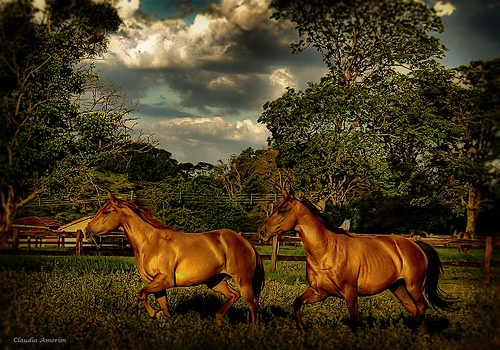

In [20]:

label_names = np.loadtxt("./Concepts81.txt",dtype='object')
arch = open("NUS-WIDE-urls.txt",'r') #lectura para mapeo de link a url
regex = re.compile("\s+")
image2url = {}
for line in arch.readlines():
    aux = regex.split(line.strip())
    image = aux[0].split("Flickr\\")[-1]
    url_m = aux[3]
    image2url[image] = url_m
arch.close()
arch = open("NUS-WIDE-Lite/image list/Train_imageOutPutFileList.txt",'r')
data_urls = [image2url[line.strip()] for line in arch.readlines()]
arch.close()

"""Visualizacion"""
from PIL import Image
s = np.random.randint(0,len(data_urls)) #mostrar para una imagen random
category_sample = np.where(y[s]==1)[0] 
print("Etiquetas de la imagen :",label_names[category_sample])
im = Image.open(urllib.request.urlopen(data_urls[s]))
im


In [24]:
print('line:=', line)
print ('image:=', image, '\n url_m:=',url_m)
print ('data_urls:= ', data_urls[s])


line:= C:\ImageData\Flickr\parade\0465_132133941.jpg   132133941  http://farm1.static.flickr.com/48/132133941_f080e72a49_b.jpg  http://farm1.static.flickr.com/48/132133941_f080e72a49.jpg  http://farm1.static.flickr.com/48/132133941_f080e72a49_m.jpg     null

image:= parade\0465_132133941.jpg 
 url_m:= http://farm1.static.flickr.com/48/132133941_f080e72a49.jpg
data_urls:=  http://farm2.static.flickr.com/1401/605709026_45aac33f0b.jpg


Este codigo revisa un archivo con todas las etiquetas posibles (concepts81) y luego revisa otro archivo que contiene los links a las distintas imagenes que estudiaremos, cada linea tiene 6 elementos, Photo_file    Photo_id    url_Large   url_Middle   url_Small  url_Original. La iteración del for sirve para tomar los datos que nos son útiles, se genera el parámetro image, que sirve como nombre del dato para la segunda parte del código. Se usa como identificación dentro del  archivo de entrenamiento. Por otro lado url_m se es la dirección de internet para acceder a la imagen en cuestión.
Para la última parte del código  se selecciona una imagen aleatoria dentro de nuestro conjunto de direcciones, data_urls. 

El resto del código es estandar,  los nombres de las etiquetas de la imagen son aquellas que coinciden con con los valores 1 de nuestro arreglo 'y' ya conocido. Se seleccionó una imagen aleatoria para la muestra.

Un problema de clasificación  Multi-Label es un problema que asigna a cada dato una cantidad de etiquetas. Estas etiquetas, no son mutuamente excluyentes, por lo que puede tener más de una etiqueta por imagen.

>c) Comente sobre la representación que posee la salida de los modelos (labels) ¿En qué dominio habita? ¿Tiene restricciones?

La representación de salida del modelo es una vector binario de alrgo 81, donde un 1 representa que la etiqueta que corresponde a esa posición es asignada a la imagen.
la función anterior entrega el nombre de las distintas etiquetas de las categorías que se encuentran en la imagen, se trata de una lista de strings, es una interpretación del vector de salida. 
Aparte de las restricciones esperables del vocabulario, el modelo solo puede entregar una etiqueta que haya sido incorporada previamente  en el archivo de conceptos y obviamente en el de entrenamiento. No hay una cantidad mínima ni máxima de etiquetas por imagen (81 por defecto), a priorí no se conoce el criterio que poseen las estiquetas, por lo que podrían existir pares anidados, como 'sky' y 'clouds', pero para determinar esto se tendrían que revisar los criterios de etiquetado originales. Como no contamos con esa información se  asume que no existen estos casos.

> d) Decida sobre una representación, en este caso descriptores, para la entrada a los modelos (input), puede utilizar la mezcla entre distintos descriptores, comente sobre la elección y qué representa.

In [34]:
file = "Normalized_CORR_Lite_Train.dat" 
descriptors2 = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/"+file,delimiter="\s",header=None).values
descriptors2.shape

C:\Users\rosar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(27807, 144)

Normalized_CORR: caracteriza la imagen usando un correlograma de 144 colores

In [35]:
CH = "Normalized_CH_Lite_Train.dat"
descriptorsCH = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/"+CH,delimiter="\s",header=None, engine='python').values
print(descriptorsCH.shape)


(27807, 64)


Normalized_CH: mediante un histograma de 64 se carateriza la imagen

In [36]:
CM55 = "Normalized_CM55_Lite_Train.dat"
descriptorsCM55 = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/"+CM55,delimiter="\s",header=None, engine='python').values
print(descriptorsCM55.shape)


(27807, 225)


Normalized_CM55: Se representa una imagen a través de un bloque de 225 medidas que caracterizan la distribuciones del color de una imagen.

In [38]:
EDH = "Normalized_EDH_Lite_Train.dat"
descriptorsEDH = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/"+EDH,delimiter="\s",header=None, engine='python').values
print(descriptorsEDH.shape)

(27807, 73)


Normalized_EDH: Una imagen es representada a partir de agrupaciones de bordes de pixeles que incurren en bordes de direcciones (en este caso 73) y contar el número de pixeles en cada dirección.

In [39]:
WT = "Normalized_WT_Lite_Train.dat"
descriptorsWT = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/"+WT,delimiter="\s",header=None, engine='python').values
print(descriptorsWT.shape)

(27807, 128)


Normalized_WT: Usa la función 128-D wavelet, para caracterizar una imagen. 128-D wavelet es una función matemática típicamente usada en la compresión de archivos y procesamiento de imágenes.

Para los siguiente análisis se representaran los datos usando el descriptor CM55, pues la distribución de colores nos puede dar una mayor información sobre los objetos que contiene la imagen. Sobre todo para etiquetas genéricas, como 'snow' o 'sky'.

> e) Deje un conjunto separado para evaluar los modelos y comportar como conjunto de pruebas, además de realizar la clásica estandarización de las entradas de los modelos.

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(descriptors,y,test_size=0.33)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [49]:
X_train.shape , X_test.shape

((18630, 64), (9177, 64))

Se separan los datos para generar el conjunto de entrenamiento y el de prueba (1/3) del total de los datos.
Como siempre se realiza un ajuste solo sobre los datos de entrenamiento (de tal forma que no se vean influenciados por la forma de los datos de prueba) con comandos de la libraria de standarScale, media 0 y desviación estandar 1.

> f) Se presenta una métrica para validar en el código a continuación, la cual mide la cantidad de aciertos a las *labels* que tenga un dato de manera normalizada. Defina **otra** métrica a utilizar con el propósito de validar lo mismo (el desempeño de un modelo).

In [50]:
def evaluation_metric(y_true,y_pred):
    suma = 0.
    for y,yp in zip(y_true,y_pred):
        suma += np.sum(y==yp, dtype='float')/len(y)  #cantidad de valores iguales
    return suma/float(len(y_true))

def alt_eval_metric(y_true,y_pred):
    for i in y_pred:
        for bit in i:
            if bit==1:
                bit=0
            elif bit==0:
                bit=1
    suma = 0.
    for y,yp in zip(y_true,y_pred):
        suma += np.sum(not y==yp, dtype='float')/len(y)  #cantidad de valores dsitintos
    return suma/float(len(y_true))

def evaluation_metric_sqrt(y_true,y_pred):
    suma = 0.
    for y,yp in zip(y_true,y_pred):
        suma += sqrt(np.sum(y==yp, dtype='float')/ len(y) )  #cantidad de valores iguales
    return suma/float(len(y_true))
        

El producto punto entre los vectores entrega cuantos valores coincidentes hubieron, al dividirlo por por la suma, da la razón de aciertos. Este valor se guarda y actualiza con suma para finalmente dividirlo por la cantidad de datos que se probaron.
Un medida de desempeño alternativa sería estudiar la cantidad de errores de predicción que comete el modelo, descartaremos esta opción ya que entrega los mismos valores, solo que el criterio de evaluación pasa a ser uno de minimización. Otra métrica posible que sigue la misma lógica sería cambiar la escala con la que se evalúan los aciertos, pasar de la lineal a una logaritmica o exponencial, para este caso elegimos una función raiz, hay una menor penalización por no predecir todos los parámetros.



> g) Experimente en resolver el problema con un Árbol de Decisión (varíando los hiper-parámetros estructurales), el cual a través de *sklearn* se puede extender de manera sencilla a *multi-label* [[4]](#refs). Mida las métricas de desempeño definidas anteriormente sobre ambos conjuntos (entrenamiento y pruebas), comente.

Se itero sobre el parámetro de profundidad del árbol, los parametros criterion y splitter se mantuvieron constantes fijando 'gini' y 'best' sobre 'entropy' debido a que a no sabes de forma confiada que algunas categorias van a estar relacionadas, puede ocurrir que existan relaciones en los datos que tenemos, pero para una generalización, una imagen puede contener cualquier elemento, se asume que no hay categorias anidadas, como 'perro' y 'animal'. 
Los resultados se encuentran gráficados, se observa que a medida que aumenta la profundiad del árbol, mejora el desempeño, esto es consistente con lo esperado, se generan mas particiones del espacio de forma tal que se separa mejor el espacio de los datos segun sus categorías.

# falta comparar los resultados

In [51]:
from math import sqrt
from sklearn.tree import DecisionTreeClassifier as Tree

In [75]:
%%time

model = Tree() 

i_p=[]
score=[]
score_n=[]
score_n_train=[]
score_train=[]
for i in range(1,20):
    depth= i*5
    i_p.append(depth)
    
    model.set_params(max_depth=depth,criterion='gini',splitter='best')
    model.fit(X_train,y_train)

#Para realizar las predicciones y evaluar utilice:

    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    
    evaluation_metric(y_test,y_pred)
    evaluation_metric_sqrt(y_test,y_pred)
    
    score.append(evaluation_metric_sqrt(y_test,y_pred))
    score_n.append(evaluation_metric(y_test,y_pred))
    score_n_train.append(evaluation_metric(y_train, y_pred_train))
    score_train.append(evaluation_metric_sqrt(y_train, y_pred_train))


Wall time: 5min 25s


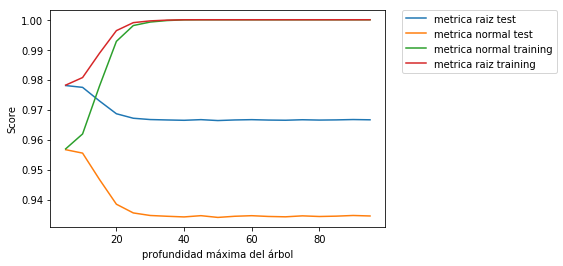

In [77]:
plt.plot(i_p, score, label='metrica raiz test')
plt.plot(i_p, score_n, label='metrica normal test')
plt.plot(i_p, score_n_train, label='metrica normal training')
plt.plot(i_p, score_train, label='metrica raiz training')

plt.xlabel('profundidad máxima del árbol')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Se puede ver que el modelo cae rápidamente en un overfitting, antes de darle una profundidad máxima de 40 al árbol.  las profundidades subsiguientes no aumenta, ya que no se genera una mejora. Se volverá a probar el modelo, pero considerando los primero 30 niveles de profundidad.
Como hipotesis mantenemos el criterio 'gini' de pureza sobre el criterio de 'entropy' de información, ya que los datos pueden no estar completamente etiquetados, pero no poseen ruido, además de que son independientes entre si. Más adelante se realizará una prueba con entropy para comprobar nuestra hipotesis.

La diferencia entre los score de un mismo conjunto es solo debido a la metrica, por lo que asumimos que un simple reescalamiento de la métrica clásica no genera cambios estructurales en los resultados del modelo. 

In [79]:
%%time

model = Tree() 

i_p=[]
score=[]
score_n=[]
score_n_train=[]
score_train=[]
for i in range(1,15):
    depth= i*2
    i_p.append(depth)
    
    model.set_params(max_depth=depth,criterion='gini',splitter='best')
    model.fit(X_train,y_train)

#Para realizar las predicciones y evaluar utilice:

    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    
    evaluation_metric(y_test,y_pred)
    evaluation_metric_sqrt(y_test,y_pred)
    
    score.append(evaluation_metric_sqrt(y_test,y_pred))
    score_n.append(evaluation_metric(y_test,y_pred))
    score_n_train.append(evaluation_metric(y_train, y_pred_train))
    score_train.append(evaluation_metric_sqrt(y_train, y_pred_train))


Wall time: 3min 4s


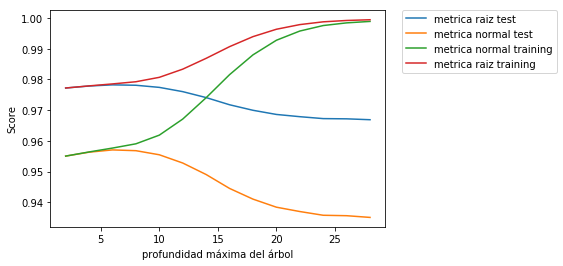

In [80]:
plt.plot(i_p, score, label='metrica raiz test')
plt.plot(i_p, score_n, label='metrica normal test')
plt.plot(i_p, score_n_train, label='metrica normal training')
plt.plot(i_p, score_train, label='metrica raiz training')

plt.xlabel('profundidad máxima del árbol')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [89]:
score
print('el mejor resultado de entrenemianto se logra con una profundidad máxima de 4 con un desempeño de' , score[3])

el mejor resultado de entrenemianto se logra con una profundidad máxima de 4 con un desempeño de 0.9781444202143619


In [81]:
%%time

model = Tree() 

i_p=[]
score=[]
score_n=[]
score_n_train=[]
score_train=[]
for i in range(1,15):
    depth= i*2
    i_p.append(depth)
    
    model.set_params(max_depth=depth,criterion='entropy',splitter='best')
    model.fit(X_train,y_train)

#Para realizar las predicciones y evaluar utilice:

    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    
    evaluation_metric(y_test,y_pred)
    evaluation_metric_sqrt(y_test,y_pred)
    
    score.append(evaluation_metric_sqrt(y_test,y_pred))
    score_n.append(evaluation_metric(y_test,y_pred))
    score_n_train.append(evaluation_metric(y_train, y_pred_train))
    score_train.append(evaluation_metric_sqrt(y_train, y_pred_train))


Wall time: 17min 33s


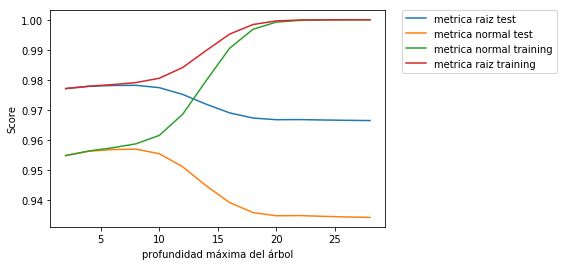

In [83]:
plt.plot(i_p, score, label='metrica raiz test')
plt.plot(i_p, score_n, label='metrica normal test')
plt.plot(i_p, score_n_train, label='metrica normal training')
plt.plot(i_p, score_train, label='metrica raiz training')

plt.xlabel('profundidad máxima del árbol')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [97]:
max(score)


0.9781444202143619

El criterio de entropia no cambia el mejor desempeño del modelo, pero si cambia la velocidad con la que este cae en overfitting.

> h) Experimente en resolver el problema con una Máquina de Soporte Vectorial no lineal (varíando los hiper-parámetros estructurales), el cual a través de *sklearn* se puede extender a *multi-label* a través de la técnica **OneVsRest**. Mida las métricas de desempeño al igual que para el Árbol de Decisión, comente y compare sobre las métricas y los tiempos de ejecución.

In [90]:
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
%%time

model= SVM()

c_p = []  #parametro c
s_p = [] #desempeño de prueba segun parametro
s_e = [] #desempeño de entrenamiento segun parametro

for i in range(-2, 5, 1): 
    c = 5 ** i  
    c_p.append(i)
    model.set_params(C=c,kernel='rbf')
    meta_model = OneVsRestClassifier(model)
    meta_model.fit(X_train,y_train)
    
    
    y_pred = meta_model.predict(X_test)
    y_pred_train = meta_model.predict(X_train)

    s_e.append(evaluation_metric_sqrt(y_train,y_pred_train))

    s_p.append(evaluation_metric_sqrt(y_test,y_pred))




In [ ]:
    
plt.plot(c_p, s_e, label='Entrenamiento')
plt.plot(c_p, s_p, label='Prueba')

plt.xlabel('Regularizador C (10^x)')
plt.ylabel('Score sqrt')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

> i) Experimente en resolver el problema con una Red Neuronal *Feed Forward* (decida el número de capas y el número de neuronas, si desea puede utilizar las por defecto). Éste modelo se extiende a *multi-label* a través de la interfaz de *keras* seleccionando una *loss* adecuada, en este caso **binary cross entropy** ¿Por qué?

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

C:\Users\rosar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [109]:
%%time
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_train.shape[1], activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy")
model.fit(X_train, y_train, epochs=40, batch_size=128, verbose=1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

Epoch 1/40
18630/18630 [==============================] - ETA: 0s - loss: 0.449 - 2s 112us/step - loss: 0.4443
Epoch 2/40
18630/18630 [==============================] - 1s 29us/step - loss: 0.1790
Epoch 3/40
18630/18630 [==============================] - 1s 30us/step - loss: 0.1540
Epoch 4/40
18630/18630 [==============================] - 1s 29us/step - loss: 0.1479
Epoch 5/40
18630/18630 [==============================] - 1s 31us/step - loss: 0.1448
Epoch 6/40
18630/18630 [==============================] - 1s 34us/step - loss: 0.1428
Epoch 7/40
18630/18630 [==============================] - 1s 30us/step - loss: 0.1413
Epoch 8/40
18630/18630 [==============================] - 1s 29us/step - loss: 0.1401
Epoch 9/40
18630/18630 [==============================] - 1s 30us/step - loss: 0.1390
Epoch 10/40
18630/18630 [==============================] - 1s 35us/step - loss: 0.1382
Epoch 11/40
18630/18630 [==============================] - 1s 29us/step - loss: 0.1374
Epoch 12/40
18630/18630 [==

La libreria de keras contiene dos funciones de perdida, binary_crossentropy y categorical_crossentropy, en este caso se prefiere la función binaria, ya que de esta forma se penaliza cada parametro de forma independiente a los otros, se estudia la probabilidad de que este o no este esa categoría, de esta forma la red neuronal entrega como salida una distribución de probabilidad para cada parametro de categoria.
Mentuvimos la red neuronal de dos capas (entrada y salida) con la función de activación sigmoid.

> j)  Realice predicciones **probabilísticas** de su modelo ¿Las probabilidades están normalizadas? ¿Por qué? Además defina una forma para pasar de la representación de las probabilidades a la representación de *labels* categoricos definidos como en c).  
*Hint: Recuerde que el no pertenecer a ninguna *label*/etiqueta es una posibilidad!!*

In [ ]:
print("Predicción 1:\n");
plt.plot(y_pred[0])

In [ ]:
print("Predicción 2:\n");
plt.plot(y_pred[10])

In [ ]:
print("Predicción 3:\n");
plt.subplot(y_pred[20])

In [ ]:
print("Predicción 3:\n");
plt.subplot(y_pred[30])
y_pred[30].mean() , y_pred[30].std()

Sabemos que la función de perdida binary crossentropy  hace que cada parametro tenga una distribución de bernoulli de probabilidad.
Como se trata de eventos independientes entre si. Esto se traduce en una distribución de probabilidad binomial de parámetros n,p, con n grande (la distinta cantidad de parámetros) y p cercano a 0,4. Se sabe que este comportamiento aproxima una distribución normal de de media n y varianza n*p*(1-p)

Con esta información, podemos tomar los datos de salida que tenemos y reinterpretarlos según las categorías que establecimos en el principio.

In [ ]:

l_pred_train=[];
l_pred_test=[];
for i in range(y_train):
    Aux1=[];
    for j in range(81):
        if y_pred_train[i][j] >= 0.4 :
            Aux1.append(1);
        else:
            Aux1.append(0);  
    l_pred_train.append(listaAux);

    if i < 9177:
        Aux2=[];
        for j in range(81):
            if y_pred[i][j] >= 0.4:
                Aux.append(1);
            else:
                 Aux.append(0);  
        l_pred_test.append(listaAux);


y_train_pred_M=np.asarray(lista_y_pred_train);
y_test_pred_M=np.asarray(lista_y_pred_test);


In [ ]:
print("Predicción 1:\n",y_test_pred_nn[0]);
print("Predicción 2:\n",y_test_pred_nn[10]);
print("Predicción 3:\n",y_test_pred_nn[20]);
print("Predicción 4:\n",y_test_pred_nn[30]);

> k) Ahora que recuperó la representación de las *labels* mida las métricas de desempeño sobre la Red Neuronal. Compare y comente.

In [ ]:
evaluation_metric_sqrt(y_test,y_test_pred_M), '\n',
evaluation_metric_sqrt(y_train,y_train_pred_M),
evaluation_metric(y_test,y_test_pred_M)
evaluation_metric(y_train,y_train_pred_M)

Los resultados de las metricas son similares para los distintos modelos probados, (árboles de búsqueda, SVM y redes neuronales). Las diferencias se observan en el tunnig de los parametros y en los tiempos de ejecución, más aún que en el caso de las redes neuronales hay que implementar un tratamiento para interpretar los resultados.

Por las diferencias en los tiempos de ejecución y su fácil comprención se recomienda usar los árboles de busqueda, el tunning de sus variables es simple de iterar y encuentra el óptimo de sus parametros sin realizar un exceso de cálculos.